In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

## Load MNIST data

In [2]:
dataset = tfds.load(name='mnist')
dataset

{'test': <DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 'train': <DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>}

## Load training split

In [3]:
dataset = tfds.load(name='mnist', split='train')
dataset

<DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

In [4]:
SHUFFLE_BUFFER_SIZE = 100
NUM_EPOCHS = 10
BATCH_SIZE = 32
dataset = dataset\
    .shuffle(SHUFFLE_BUFFER_SIZE)\
    .repeat(NUM_EPOCHS)\
    .batch(BATCH_SIZE)

In [5]:
iterator = dataset.take(3)

In [6]:
for data in iterator:
    print(data['image'].numpy().shape)

(32, 28, 28, 1)
(32, 28, 28, 1)
(32, 28, 28, 1)


In [7]:
data['image'].numpy()[0].squeeze().shape

(28, 28)

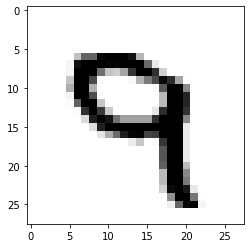

In [8]:
plt.imshow(data['image'].numpy()[0].squeeze(), cmap=plt.cm.binary)
plt.show()

## Load with info

In [9]:
dataset, info = tfds.load(name='mnist', with_info=True)

In [10]:
info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

In [11]:
info.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

In [12]:
info.splits['train'].num_examples

60000

## Load with split

In [13]:
dataset_train = tfds.load(name='mnist', split=tfds.Split.TRAIN)
# dataset_val = tfds.load(name='mnist', split=tfds.Split.VALIDATION)
dataset_test = tfds.load(name='mnist', split=tfds.Split.TEST)
# dataset_all = tfds.load(name='mnist', split=tfds.Split.ALL)

## Load as supervised

In [14]:
dataset = tfds.load('mnist', as_supervised=True)
dataset

{'test': <DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 'train': <DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}

In [15]:
dataset['train'].take(1)

<DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

In [16]:
for image, label in dataset['train'].take(1):
    print(f"image.shape = {image.shape}, label = {label}, label.shape = {label.shape}")

image.shape = (28, 28, 1), label = 4, label.shape = ()


## Load by version

In [17]:
dataset_v1, info_v1 = tfds.load(name='mnist:1.*.*', with_info=True)

In [18]:
info_v1

tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

## DatasetBuilder API

In [19]:
mnist_builder = tfds.builder('mnist')
mnist_builder.download_and_prepare()
dataset = mnist_builder.as_dataset(split=tfds.Split.TRAIN)
dataset

<DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

## List datasets

In [20]:
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'cos_e',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'eraser_multi_rc',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'gr